In [1]:
import numpy as np
import pandas as pd
import xarray
import uxarray


def xtime(ds: xarray.Dataset):
    """convert xtime variable to datetime and assign to coordinate"""
    Time = pd.to_datetime(
        ds["xtime"].load().item().decode("utf-8").strip(),
        format="%Y-%m-%d_%H:%M:%S",
    )
    ds = ds.assign(Time=[Time])
    ds = ds.drop_vars("xtime")
    return ds

In [ ]:
import numpy as np

import uxarray

grid_path = "/glade/campaign/mmm/wmr/weiwang/cps/irma3/2020/tk707_conus/init.nc"
data_path = "/glade/campaign/mmm/wmr/weiwang/cps/irma3/mp6/tk707/diag.2017-09-07_09.00.00.nc"
uxds = uxarray.open_mfdataset(
    grid_path,
    data_path
)

# Trim domain
lon_bounds = (-74, -64)
lat_bounds = (18, 24)
uxda = uxds["refl10cm_max"].isel(Time=0).subset.bounding_box(lon_bounds, lat_bounds)

# this is how you use this function to smooth with 0.25-deg filter.
uxda_mean = uxda.neighborhood_filter(func=np.mean, r=0.25)


# this is another way to use this function with a maximum filter
uxda_max = uxda.neighborhood_filter(func=max, r=0.25)

(uxda.plot.rasterize() + uxda_mean.plot.rasterize() + uxda_max.plot.rasterize()).cols(1)

In [ ]:
if True:
    if True:
        if (
            self._ball_tree is None
            or coordinates != self._ball_tree._coordinates
            or reconstruct
        ):
            self._ball_tree = BallTree(
                self,
                coordinates=coordinates,
                distance_metric=distance_metric,
                coordinate_system=coordinate_system,
                reconstruct=reconstruct,
            )

In [2]:
grid_path = "/glade/campaign/mmm/parc/schwartz/MPAS_regional/15km_mesh_regional/mpas_init/regional_15km_mesh_5500km.static.nc"
data_path = "/glade/campaign/mmm/parc/schwartz/MPAS_regional/15km_mesh_regional/precip_3hrly_5500km/native_grid/ens_4/mpas_precip_2017050200_f006_3hr_pcp.nc"
uxds = uxarray.open_dataset(
    grid_path,
    data_path
)
uxds = xtime(uxds)

uxds

<xarray.UxDataset> Size: 8MB
Dimensions:       (Time: 1, n_face: 474053)
Coordinates:
  * Time          (Time) datetime64[ns] 8B 2017-05-02T06:00:00
Dimensions without coordinates: n_face
Data variables:
    total_precip  (Time, n_face) float32 2MB 0.0 0.007645 0.0 ... 0.0 0.0 0.0
    rainnc        (Time, n_face) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    rainc         (Time, n_face) float32 2MB 0.0 0.007645 0.0 ... 0.0 0.0 0.0
    indices       (n_face) int32 2MB 0 1 2 3 4 ... 474049 474050 474051 474052

In [3]:
uxds["rainnc"].neighborhood_filter()

<xarray.UxDataArray 'rainnc' (Time: 1, n_face: 474053)> Size: 4MB
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.16768518e-13, 7.60799068e-08]])
Coordinates:
  * Time     (Time) datetime64[ns] 8B 2017-05-02T06:00:00
Dimensions without coordinates: n_face
Attributes:
    units:        mm
    description:  3-hr explict, non-parameterized accumulated precipitation

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
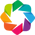

:Image   [x,y]   (x_y rainnc)

In [4]:
# Trim domain
uxda = uxds["rainnc"].isel(Time=0).subset.bounding_circle((-75, 42), r=.5)
uxda.plot.rasterize()

In [29]:
uxda.neighborhood_filter(func=np.mean, r=.02).plot.rasterize()

:Image   [x,y]   (x_y rainnc)

In [6]:
tree = uxda.uxgrid.get_ball_tree(coordinates="face centers")
dir(tree)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_from_edge_centers',
 '_build_from_face_centers',
 '_build_from_nodes',
 '_coordinates',
 '_current_tree',
 '_n_elements',
 '_source_grid',
 '_tree_from_edge_centers',
 '_tree_from_face_centers',
 '_tree_from_nodes',
 'coordinate_system',
 'coordinates',
 'distance_metric',
 'query',
 'query_radius',
 'reconstruct']

In [7]:
x = [1,4,7,9]
y = [2,4,7,13]
z = [0, -1, 3, 0]
np.c_[x,y, z]

array([[ 1,  2,  0],
       [ 4,  4, -1],
       [ 7,  7,  3],
       [ 9, 13,  0]])

In [8]:
np.array([x,y, z]).T

array([[ 1,  2,  0],
       [ 4,  4, -1],
       [ 7,  7,  3],
       [ 9, 13,  0]])

In [9]:
# this is how you use this function to smooth with 0.125-deg filter.

uxds["rainnc"].isel(Time=0, n_face=[2,56])
#.plot.rasterize()

<xarray.UxDataArray 'rainnc' (Time: 1, n_face: 2)> Size: 8B
array([[0.        , 0.19576575]], dtype=float32)
Coordinates:
  * Time     (Time) datetime64[ns] 8B 2017-05-02T06:00:00
Dimensions without coordinates: n_face
Attributes:
    units:        mm
    description:  3-hr explict, non-parameterized accumulated precipitation

In [10]:
fas, j = uxds["rainnc"].isel(Time=0).uxgrid.compute_face_areas(latlon=True)
np.sum(fas)

2.274990382574141

In [11]:
import os
grid_path = data_path = os.getenv("SCRATCH") + "/uxarray/test/meshfiles/mpas/QU/oQU480.231010.nc"
uxds = uxarray.open_dataset(
    grid_path,
    data_path
)
uxds = uxds.assign(Time=[14])
uxds

<xarray.UxDataset> Size: 5MB
Dimensions:                   (n_face: 1791, n_edge: 5754, n_node: 3947,
                               n_max_face_nodes: 6, maxEdges2: 12, TWO: 2,
                               vertexDegree: 3, nVertLevels: 60, Time: 1)
Coordinates:
  * Time                      (Time) int64 8B 14
Dimensions without coordinates: n_face, n_edge, n_node, n_max_face_nodes,
                                maxEdges2, TWO, vertexDegree, nVertLevels
Data variables: (12/55)
    latCell                   (n_face) float64 14kB 0.4636 1.571 ... -0.8955
    lonCell                   (n_face) float64 14kB 3.23 2.038 ... 3.23 3.169
    xCell                     (n_face) float64 14kB -5.677e+06 ... -3.981e+06
    yCell                     (n_face) float64 14kB -5.013e+05 ... -1.082e+05
    zCell                     (n_face) float64 14kB 2.849e+06 ... -4.973e+06
    indexToCellID             (n_face) int32 7kB 1 2 3 4 ... 1788 1789 1790 1791
    ...                        ...
    refTopDepth               (nVertLevels) float64 480B 0.0 10.0 ... 5.25e+03
    refZMid                   (nVertLevels) float64 480B -5.0 ... -5.375e+03
    refLayerThickness         (nVertLevels) float64 480B 10.0 10.0 ... 250.0
    layerThickness            (Time, n_face, nVertLevels) float64 860kB 10.0 ...
    ssh                       (Time, n_face) float64 14kB 9.095e-13 ... 9.095...
    zMid                      (Time, n_face, nVertLevels) float64 860kB -5.0 ...

In [12]:
uxds.ssh.isel(Time=0).plot.polygons()

:Polygons   [x,y]   (ssh)

In [13]:
uxds.ssh.isel(Time=0).neighborhood_filter(r=80).plot.polygons()

:Polygons   [x,y]   (ssh)

In [14]:
from pathlib import Path
grid_path = os.getenv("SCRATCH") + "/uxarray/test/meshfiles/ugrid/geoflow-small/grid.nc"
data_path = Path(os.getenv("SCRATCH") + "/uxarray/test/meshfiles/ugrid/geoflow-small").glob("v?.nc")
uxds = uxarray.open_mfdataset(
    grid_path,
    data_path
)
uxds

<xarray.UxDataset> Size: 3MB
Dimensions:  (time: 1, meshLayers: 20, n_node: 6000)
Coordinates:
  * time     (time) float64 8B 13.0
Dimensions without coordinates: meshLayers, n_node
Data variables:
    v1       (time, meshLayers, n_node) float64 960kB dask.array<chunksize=(1, 20, 6000), meta=np.ndarray>
    v2       (time, meshLayers, n_node) float64 960kB dask.array<chunksize=(1, 20, 6000), meta=np.ndarray>
    v3       (time, meshLayers, n_node) float64 960kB dask.array<chunksize=(1, 20, 6000), meta=np.ndarray>

In [15]:
from pathlib import Path
grid_path = os.getenv("SCRATCH") + "/uxarray/test/meshfiles/exodus/outCSne8/outCSne8.g"
data_path = grid_path #Path(os.getenv("SCRATCH") + "/uxarray/test/meshfiles/ugrid/fesom").glob("[ss]*.nc")
uxds = uxarray.open_mfdataset(
    grid_path,
    data_path
)
uxds

<xarray.UxDataset> Size: 26kB
Dimensions:     (time_step: 0, num_qa_rec: 1, four: 4, num_dim: 3,
                 num_el_blk: 1, n_face: 384, num_att_in_blk1: 1,
                 num_nod_per_el1: 4, n_node: 386)
Dimensions without coordinates: time_step, num_qa_rec, four, num_dim,
                                num_el_blk, n_face, num_att_in_blk1,
                                num_nod_per_el1, n_node
Data variables:
    time_whole  (time_step) float64 0B dask.array<chunksize=(0,), meta=np.ndarray>
    qa_records  (num_qa_rec, four) |S33 132B dask.array<chunksize=(1, 4), meta=np.ndarray>
    coor_names  (num_dim) |S33 99B dask.array<chunksize=(3,), meta=np.ndarray>
    eb_names    (num_el_blk) |S33 33B dask.array<chunksize=(1,), meta=np.ndarray>
    eb_status   (num_el_blk) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    eb_prop1    (num_el_blk) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    attrib1     (n_face, num_att_in_blk1) float64 3kB dask.array<chunksize=(384, 1), meta=np.ndarray>
    connect1    (n_face, num_nod_per_el1) int32 6kB dask.array<chunksize=(384, 4), meta=np.ndarray>
    global_id1  (n_face) int32 2kB dask.array<chunksize=(384,), meta=np.ndarray>
    edge_type1  (n_face, num_nod_per_el1) int32 6kB dask.array<chunksize=(384, 4), meta=np.ndarray>
    coord       (num_dim, n_node) float64 9kB dask.array<chunksize=(3, 386), meta=np.ndarray>

In [16]:
uxds.uxgrid.get_ball_tree(coordinates="face centers", coordinate_system="cartesian", distance_metric="minkowski", reconstruct=True).coordinates

/glade/work/ahijevyc/conda-envs/uxarray/lib/python3.11/site-packages/uxarray/grid/coordinates.py:229: UserWarning: This cannot be guaranteed to work correctly on concave polygons
  warnings.warn("This cannot be guaranteed to work correctly on concave polygons")


'face centers'

In [17]:
uxds.uxgrid.get_ball_tree(reconstruct=True).coordinates

'nodes'

In [18]:
uxds.uxgrid.get_ball_tree(coordinates="face centers").distance_metric

'haversine'

In [19]:
import matplotlib.pyplot as plt
uxds.global_id1.plot.polygons()

:Polygons   [x,y]   (global_id1)

In [20]:
a = uxds["global_id1"]
a[:] = 0
a[10] = 500
uxds["global_id2"] = a
uxds.global_id2.plot.polygons()

:Polygons   [x,y]   (global_id2)

In [21]:
uxds

<xarray.UxDataset> Size: 28kB
Dimensions:     (time_step: 0, num_qa_rec: 1, four: 4, num_dim: 3,
                 num_el_blk: 1, n_face: 384, num_att_in_blk1: 1,
                 num_nod_per_el1: 4, n_node: 386)
Dimensions without coordinates: time_step, num_qa_rec, four, num_dim,
                                num_el_blk, n_face, num_att_in_blk1,
                                num_nod_per_el1, n_node
Data variables:
    time_whole  (time_step) float64 0B dask.array<chunksize=(0,), meta=np.ndarray>
    qa_records  (num_qa_rec, four) |S33 132B dask.array<chunksize=(1, 4), meta=np.ndarray>
    coor_names  (num_dim) |S33 99B dask.array<chunksize=(3,), meta=np.ndarray>
    eb_names    (num_el_blk) |S33 33B dask.array<chunksize=(1,), meta=np.ndarray>
    eb_status   (num_el_blk) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    eb_prop1    (num_el_blk) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    attrib1     (n_face, num_att_in_blk1) float64 3kB dask.array<chunksize=(384, 1), meta=np.ndarray>
    connect1    (n_face, num_nod_per_el1) int32 6kB dask.array<chunksize=(384, 4), meta=np.ndarray>
    global_id1  (n_face) int32 2kB dask.array<chunksize=(384,), meta=np.ndarray>
    edge_type1  (n_face, num_nod_per_el1) int32 6kB dask.array<chunksize=(384, 4), meta=np.ndarray>
    coord       (num_dim, n_node) float64 9kB dask.array<chunksize=(3, 386), meta=np.ndarray>
    global_id2  (n_face) int32 2kB dask.array<chunksize=(384,), meta=np.ndarray>

In [22]:
uxds.uxgrid.get_ball_tree(coordinates="face centers").coordinates

'face centers'

In [23]:
uxds.uxgrid.get_ball_tree(reconstruct=False).coordinates

'nodes'

In [24]:
from uxarray.constants import GRID_DIMS
grid_dims = [d for d in uxds.attrib1.dims if d in GRID_DIMS]
uxds.attrib1.transpose(..., grid_dims[0])

<xarray.UxDataArray 'attrib1' (num_att_in_blk1: 1, n_face: 384)> Size: 3kB
dask.array<transpose, shape=(1, 384), dtype=float64, chunksize=(1, 384), chunktype=numpy.ndarray>
Dimensions without coordinates: num_att_in_blk1, n_face

In [25]:
uxds.neighborhood_filter(r=45).global_id2.plot.polygons()

:Polygons   [x,y]   (global_id2)

In [26]:
uxds.neighborhood_filter(r=45)

<xarray.UxDataset> Size: 43kB
Dimensions:     (time_step: 0, num_qa_rec: 1, four: 4, num_dim: 3,
                 num_el_blk: 1, n_face: 384, num_att_in_blk1: 1,
                 num_nod_per_el1: 4, n_node: 386)
Dimensions without coordinates: time_step, num_qa_rec, four, num_dim,
                                num_el_blk, n_face, num_att_in_blk1,
                                num_nod_per_el1, n_node
Data variables:
    time_whole  (time_step) float64 0B dask.array<chunksize=(0,), meta=np.ndarray>
    qa_records  (num_qa_rec, four) |S33 132B dask.array<chunksize=(1, 4), meta=np.ndarray>
    coor_names  (num_dim) |S33 99B dask.array<chunksize=(3,), meta=np.ndarray>
    eb_names    (num_el_blk) |S33 33B dask.array<chunksize=(1,), meta=np.ndarray>
    eb_status   (num_el_blk) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    eb_prop1    (num_el_blk) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    attrib1     (n_face, num_att_in_blk1) float64 3kB 9.969e+36 ... 9.969e+36
    connect1    (n_face, num_nod_per_el1) float64 12kB 170.6 170.6 ... 224.2
    global_id1  (n_face) float64 3kB 8.929 8.621 8.772 9.434 ... 0.0 0.0 0.0 0.0
    edge_type1  (n_face, num_nod_per_el1) float64 12kB 0.0 0.0 0.0 ... 0.0 0.0
    coord       (num_dim, n_node) float64 9kB -0.1661 0.1661 ... 0.1641 0.2065
    global_id2  (n_face) float64 3kB 8.929 8.621 8.772 9.434 ... 0.0 0.0 0.0 0.0

In [27]:
uxds.attrib1.transpose(*uxds.attrib1.dims)

<xarray.UxDataArray 'attrib1' (n_face: 384, num_att_in_blk1: 1)> Size: 3kB
dask.array<open_dataset-attrib1, shape=(384, 1), dtype=float64, chunksize=(384, 1), chunktype=numpy.ndarray>
Dimensions without coordinates: n_face, num_att_in_blk1